# Cargar Datos

In [ ]:
!unzip /content/pan22-author-profiling-training-2022-03-29.zip

Archive:  /content/pan22-author-profiling-training-2022-03-29.zip
   creating: pan22-author-profiling-training-2022-03-29/
   creating: pan22-author-profiling-training-2022-03-29/en/
  inflating: pan22-author-profiling-training-2022-03-29/en/10ab2dd4ee613f404dea447947d4ced6.xml  
  inflating: pan22-author-profiling-training-2022-03-29/en/10c5a772d6040446e6a5b337a1602429.xml  
  inflating: pan22-author-profiling-training-2022-03-29/en/10f3590ec6f055097a98bde11fbc2451.xml  
  inflating: pan22-author-profiling-training-2022-03-29/en/113291a148cd55140fd2819e9299e239.xml  
  inflating: pan22-author-profiling-training-2022-03-29/en/1136f2bf0376cba4e93913b447fb5517.xml  
  inflating: pan22-author-profiling-training-2022-03-29/en/11790334350e58e6c92fdeb1d10bc161.xml  
  inflating: pan22-author-profiling-training-2022-03-29/en/120fbd774da20ff47634965e797bed1b.xml  
  inflating: pan22-author-profiling-training-2022-03-29/en/1314f59250b882f9bf7edfedc5f42acd.xml  
  inflating: pan22-author-profili

In [ ]:
!unzip /content/pan22-author-profiling-test-2022-04-22-without_truth.zip

In [ ]:
import re 
 
def find_tweets(s):
    try:
        regex = "CDATA\[(.*?)\]"
        return re.findall(regex, s, flags = re.DOTALL)
    except ValueError:
        return -1

In [ ]:
from pathlib import Path

dataset_path = Path('/content/pan22-author-profiling-training-2022-03-29/en')

with open(dataset_path / 'truth.txt') as f:
  ground_truth = f.read()

labels = {}
for x in ground_truth.split():
  id, label = x.split(':::')
  labels[id] = label

dataset = [{'id': x.name[:-4], 'data':find_tweets(open(x).read()), 'label': labels[x.name[:-4]]} for x in dataset_path.iterdir() if x.name.endswith('.xml')]

In [ ]:
from pathlib import Path

dataset_path = Path('/content/pan22-author-profiling-test-2022-04-22-without_truth/en')

dataset_test = [{'id': x.name[:-4], 'data':find_tweets(open(x).read())} for x in dataset_path.iterdir() if x.name.endswith('.xml')]

FileNotFoundError: ignored

In [ ]:
print(dataset[0])

{'id': '4267281d889f4e1b593637ae20d04eba', 'data': ['#USER# About 80% of my followers are #HASHTAG#, we agree #HASHTAG# to discuss religion. #HASHTAG#', "#USER# The #HASHTAG# I go to, has #HASHTAG# all their patients, &amp; staff, except for children, who cannot be vaccinated yet. I had #HASHTAG#-19, survived, then had 2 #HASHTAG# injections; #HASHTAG#. It's gotten me through the winter, without catching a cold.", "#HASHTAG#, when I'm not #HASHTAG# like a #HASHTAG#, I often talk about myself, if you don't like that, feel free to ignore me, but I'm old(only 64),&amp; I learned most of life's lessons the hard way; some people benefit from my experiences.Also, sometimes, I think I'm a comedian.", '#USER# The majority of the Christians I meet are #HASHTAG# Christian at all.', '#HASHTAG#, #HASHTAG#, #HASHTAG#, #HASHTAG#, "#HASHTAG# are #HASHTAG#." #HASHTAG# attacks are not examples of thinking, nor are they beneficial/productive. #URL#', "#USER# #USER# The #HASHTAG# is a #HASHTAG#, I'm surp

In [ ]:
print(dataset_test[0])

{'id': '9e2ed1159570f17dbc22eb0849dc53a', 'data': ['#USER# #USER# Some people think they can advance their careers more easily by pursuing placation, I guess.', "#USER# Despite everything that was thrown at them because there were loads of people willing to fight for it- (and get themselves hurt in some cases) I think Labour picked up 5 or 6 points in the campaign. They don't have that line of defence this time.", "#USER# The delusion of thinking the Labour right are going to help any alliance like that too. They're fucking jackals who hate each other- they fucking hate Lib Dems and Greens who they think are bearded hippies on bicycles who don't like war and putting people in prison enough.", "We could see Labour running Smethwick 1964 style campaigns to try appeal to white voters next time. I'm really not sure I'm exaggerating there, these people are so deeply Islamophobic (and racist in other ways) that I think they'll think it's a good campaign tactic.", "#USER# It's an antisemitic 

In [ ]:
print(dataset[0]['data'])

['#USER# About 80% of my followers are #HASHTAG#, we agree #HASHTAG# to discuss religion. #HASHTAG#', "#USER# The #HASHTAG# I go to, has #HASHTAG# all their patients, &amp; staff, except for children, who cannot be vaccinated yet. I had #HASHTAG#-19, survived, then had 2 #HASHTAG# injections; #HASHTAG#. It's gotten me through the winter, without catching a cold.", "#HASHTAG#, when I'm not #HASHTAG# like a #HASHTAG#, I often talk about myself, if you don't like that, feel free to ignore me, but I'm old(only 64),&amp; I learned most of life's lessons the hard way; some people benefit from my experiences.Also, sometimes, I think I'm a comedian.", '#USER# The majority of the Christians I meet are #HASHTAG# Christian at all.', '#HASHTAG#, #HASHTAG#, #HASHTAG#, #HASHTAG#, "#HASHTAG# are #HASHTAG#." #HASHTAG# attacks are not examples of thinking, nor are they beneficial/productive. #URL#', "#USER# #USER# The #HASHTAG# is a #HASHTAG#, I'm surprised that other #HASHTAG# haven't come forward to 

# Vectorizar

In [ ]:
#### CON BERT ####
!pip install transformers

import torch
from transformers import AutoModel, AutoTokenizer, AutoModelForSequenceClassification, DistilBertModel,BertModel, DistilBertTokenizer,BertTokenizer
import numpy as np

     |████████████████████████████████| 4.2 MB 14.4 MB/s 
     |████████████████████████████████| 6.6 MB 58.9 MB/s 
     |████████████████████████████████| 84 kB 4.0 MB/s 
     |████████████████████████████████| 596 kB 66.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Bert

In [ ]:
device = torch.device('cuda:0')

# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (DistilBertModel, DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (BertModel, BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights).to(device)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
for i, data in enumerate(dataset):
  print(i)
  features = []
  masks = []
  tokenized = [tokenizer.encode(x, add_special_tokens=True) for x in data['data']]
  max_len = 0
  for i in tokenized:
      if len(i) > max_len:
          max_len = len(i)
  padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized])
  attention_mask = np.where(padded != 0, 1, 0)
  input_ids = torch.tensor(padded).to(device)
  attention_mask = torch.tensor(attention_mask).to(device)
  with torch.no_grad():
      last_hidden_states = model(input_ids, attention_mask=attention_mask)
  data['bert'] = last_hidden_states[0][:,0,:].cpu().numpy()
  
  #features.append(last_hidden_states[0][:,0,:].numpy())
    #tweets_tokenized.append(torch.unsqueeze(tokenized, 0))
    #masks.append(torch.unsqueeze(attention_mask, 0))
    # Padding antes o después de concatenaR???
  # tokenized = torch.cat(tweets_tokenized, 1)
  # attention_mask = np.where(tokenized != 0, 1, 0)

  
  # features = last_hidden_states[0][:,0,:].numpy()
  # data['bert'] = features

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
for data in dataset:
  data['bert2'] = np.concatenate([tweet for tweet in data['bert']])

In [ ]:
print(dataset[0]['bert'].shape)
print(dataset[0]['bert2'].shape)

(200, 768)
(153600,)


In [ ]:
for i, data in enumerate(dataset_test):
  print(i)
  features = []
  masks = []
  tokenized = [tokenizer.encode(x, add_special_tokens=True) for x in data['data']]
  max_len = 0
  for i in tokenized:
      if len(i) > max_len:
          max_len = len(i)
  padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized])
  attention_mask = np.where(padded != 0, 1, 0)
  input_ids = torch.tensor(padded).to(device)
  attention_mask = torch.tensor(attention_mask).to(device)
  with torch.no_grad():
      last_hidden_states = model(input_ids, attention_mask=attention_mask)
  data['bert'] = last_hidden_states[0][:,0,:].cpu().numpy()

NameError: ignored

In [ ]:
for data in dataset_test:
  data['bert2'] = np.concatenate([tweet for tweet in data['bert']])

# Entrenamiento

In [ ]:
labels = [x['label'] for x in dataset]
vectors = [x['bert2'] for x in dataset]

In [ ]:
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn import neighbors

#classifier = svm.SVC(C=25 ,kernel='linear') # 0.902
#classifier = svm.SVC(C=30 ,kernel='linear') # 0.902
#classifier = svm.LinearSVC(C=50, tol=0.1, loss='hinge', max_iter=10000000) # 0.898
#classifier = LogisticRegression(max_iter=100)
#classifier = GradientBoostingClassifier(n_estimators=10, learning_rate=00.1, max_depth = 10) # 0.821
#classifier = SGDClassifier() # 0.869
#classifier = neighbors.KNeighborsClassifier(n_neighbors=100) # malisimo

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, vectors, labels, cv=10)
print("Dummy classifier score: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

KeyboardInterrupt: ignored

In [ ]:
for score in scores:
  print(score)

0.8809523809523809
0.8571428571428571
0.8095238095238095
0.8809523809523809
0.9523809523809523
0.9285714285714286
0.9047619047619048
0.8571428571428571
0.9523809523809523
0.8095238095238095


In [ ]:
from numpy import sqrt 

def accuracy95(p,ndatos):
    return 1.95*sqrt(p*(1-p) /ndatos)

In [ ]:
intervalos_scores = [accuracy95(p,len(dataset)/10) for p in scores]

In [ ]:
for score, intervalo in zip(scores, intervalos_scores):
  print('media : %0.3f, - intervalo: %0.3f - %0.3f' % (score, score - intervalo, score+intervalo) )

media : 0.881, - intervalo: 0.784 - 0.978
media : 0.857, - intervalo: 0.752 - 0.962
media : 0.810, - intervalo: 0.691 - 0.928
media : 0.881, - intervalo: 0.784 - 0.978
media : 0.952, - intervalo: 0.888 - 1.016
media : 0.929, - intervalo: 0.851 - 1.006
media : 0.905, - intervalo: 0.816 - 0.993
media : 0.857, - intervalo: 0.752 - 0.962
media : 0.952, - intervalo: 0.888 - 1.016
media : 0.810, - intervalo: 0.691 - 0.928


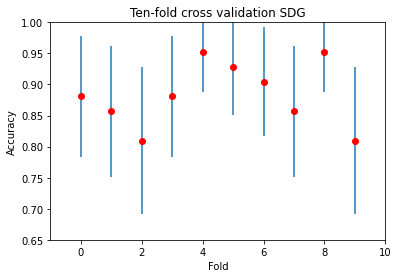

In [ ]:
import matplotlib.pyplot as plt
x=[i for i in range(10)]
results=scores
y=results # results es una lista con los resultados de cada experimento
plt.axis([-1, 10, 0.65, 1])
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title('Ten-fold cross validation SDG')
plt.plot(x,y,'ro')
Tic=intervalos_scores# Lista con los intervalos de confianza
plt.errorbar(x,y,yerr=Tic,linestyle='None')
plt.show()

# Para subir

In [ ]:
classifier.fit(vectors, labels)

SVC(C=30, kernel='linear')

In [ ]:
from sklearn.metrics import classification_report
test_vectors = [x['bert2'] for x in dataset]

predicciones = classifier.predict(test_vectors)

In [ ]:
len(predicciones)

In [ ]:
acc = 0
for pred,lab in zip(predicciones,labels):
  if pred == lab:
    acc+=1
acc /= len(predicciones)
print(acc)

1.0


In [ ]:
from sklearn.metrics import classification_report
test_vectors = [x['bert2'] for x in dataset_test]

predicciones = classifier.predict(test_vectors)

In [ ]:
import xml.etree.cElementTree as ET
ids = [x['id'] for x in dataset_test]
i = 1
for author_id, pred in zip(ids, predicciones):
  print(i)
  i+=1
  root = ET.Element("author", id=author_id, lang="en", type=pred)
  # doc = ET.SubElement(root, "doc")

  # ET.SubElement(doc, "author", id="id", lang="en", type="NI")
  # ET.SubElement(doc, "field2", name="asdfasd").text = "some vlaue2"

  tree = ET.ElementTree(root)
  tree.write(author_id+".xml")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180


In [ ]:
ls ./outputs

100ff179983b65bf748ebc64f2966cda.xml  821aca97820fffa344f36c04ecc76977.xml
11af5d73a6168f5d449788d432d3a71c.xml  8273c259428ab10f60e0deab7db3aebd.xml
124b8295f6a00d05825c229a39207586.xml  851542393660bafcd57734a91be6a9bf.xml
1272428df3ae67f538fb0f7b3e0f3f6c.xml  85c7fc3467f162a0ae4b4e4ea0c93844.xml
1337cd846e2b71e353442d641e5acec4.xml  8891c5e078a5a0fb31165fab403f8f02.xml
13c0827671f407ed45e78b0b5c5b793f.xml  893cba19b29b2e17951d6acf43b2c45.xml
146a26134931e1770af27c20bb4acfa8.xml  8947949be2bb85a177daa9be7de6d568.xml
17b5a5c1673335c4b3b9753fa7e194de.xml  8a030f3bbfcf12db415cd1b19c69dbd8.xml
17cf5a70d4e3ade4e4e031fc0818626e.xml  9228dac155633b13780552bc01dc2e0.xml
17d5240b3616194baf205739c76e7a72.xml  925754818a824e30d43c32f4a06ad88d.xml
188b8b2b9f46999c832bcf2fad3610d9.xml  969d2dba2d508cc84edbbae4648dd286.xml
18cab06282ac3225d75b2cdafde1520b.xml  99ef32070fa9ea7e5952193b1b50dafc.xml
199b3fb39de3ef20bda586a7a7ef8932.xml  9b838af92dfe5f1a2df902c5cca8462e.xml
1a1f45cdfe6d25473a0bd7242c3

In [ ]:
!zip -r /content/tests4.zip ./

  adding: 9e2ed1159570f17dbc22eb0849dc53a.xml (stored 0%)
  adding: 676ac6f0f8dc64239691d8052409a54c.xml (stored 0%)
  adding: ebc12c72878213b4454d2f6ccdb708d.xml (stored 0%)
  adding: df9e77676844c1fda46ad4534b4767e5.xml (stored 0%)
  adding: aff307c6397a566f998178f78fc516a2.xml (stored 0%)
  adding: 9228dac155633b13780552bc01dc2e0.xml (stored 0%)
  adding: de55073df4ac9416d86a5cd5ed299494.xml (stored 0%)
  adding: 7d9d096f08714768b743f91bef985505.xml (stored 0%)
  adding: 4d8ae2f1f0f57e1b55bd261fb183371c.xml (stored 0%)
  adding: 851542393660bafcd57734a91be6a9bf.xml (stored 0%)
  adding: e59cae77d833f47f5673f0628cbfb69.xml (stored 0%)
  adding: c389444098a230b8c4914cb0bf33781.xml (stored 0%)
  adding: 11af5d73a6168f5d449788d432d3a71c.xml (stored 0%)
  adding: 78e70dd9326c5b7dbaeb371a9b8bf126.xml (stored 0%)
  adding: 3db3d232cde8ccede9e3138a660e6a4c.xml (stored 0%)
  adding: 188b8b2b9f46999c832bcf2fad3610d9.xml (stored 0%)
  adding: ffc8184d3f3fec0e5b5b42c22d86da2a.xml (stored 0%)
  